In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


In [2]:
data = pd.read_csv('cardio_train.csv', sep=';')

# Data analysis and pre-processing

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.shape

(70000, 13)

In [5]:
#check if any empty values present
print("Empty values present: {}".format(data.isnull().values.any()))

Empty values present: False


In [6]:
# checking for imbalance
cardio = data[data["cardio"]==1]
noncardio = data[data["cardio"]==0]
print(cardio.shape, noncardio.shape)

(34979, 13) (35021, 13)


In [7]:
# checking data type
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
# dropping the id from the data
data.drop("id",axis=1,inplace=True)

In [9]:
# Checking the duplicates
print("There are {} duplicated values in data frame".format(data.duplicated().sum()))
duplicated = data[data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
duplicated.head(2) 


There are 24 duplicated values in data frame


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1


In [10]:
#drop duplicates
data.drop_duplicates(inplace=True)
print("There are {} duplicated values in data frame now".format(data.duplicated().sum()))

There are 0 duplicated values in data frame now


In [11]:
# converting the age from days to years
data['age'] = (data['age'] / 365).round().astype('int')

# Checking for outliers in the data and dealing with outliers

In [12]:
# checking the top 5 rows
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.338945,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.765633,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


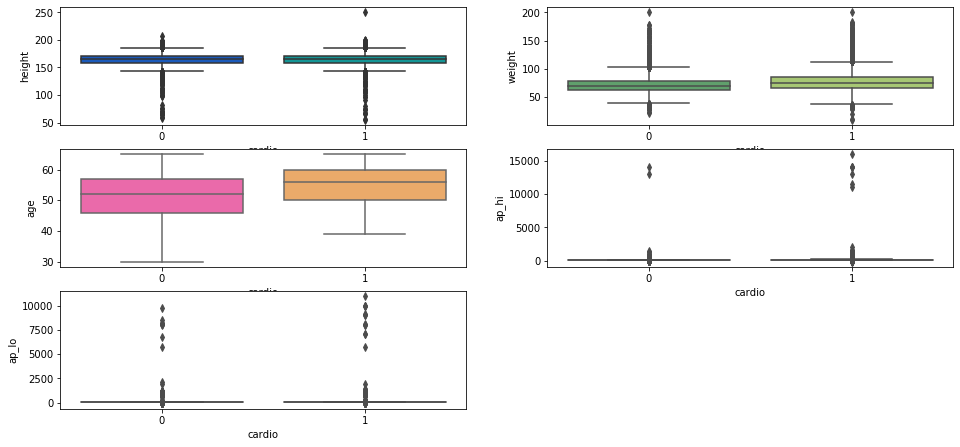

In [14]:
# Generate boxplots to identify possible outliers
plt.figure(figsize=(16,10))
plt.subplot(4,2,1)
sns.boxplot(x='cardio',y='height',data=data,palette='winter')
plt.subplot(4,2,2)
sns.boxplot(x='cardio',y='weight',data=data,palette='summer')
plt.subplot(4,2,3)
sns.boxplot(x='cardio',y='age',data=data,palette='spring')
plt.subplot(4,2,4)
sns.boxplot(x='cardio',y='ap_hi',data=data,palette='autumn')
plt.subplot(4,2,5)
sns.boxplot(x='cardio',y='ap_lo',data=data,palette='bright')



In [15]:
# Removing the outliers from the height and weight, for example height of 55 will not be considered.

data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)



In [16]:
# Looking at the data after removing the ourliers in weight and height
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000,63842.000000
mean,53.349738,1.347890,164.497823,73.546415,128.818912,95.959462,1.359184,1.222737,0.086385,0.052896,0.803672,0.498277
std,6.751078,0.476305,6.863199,11.721811,161.017939,186.322126,0.674872,0.568992,0.280934,0.223828,0.397223,0.500001
min,30.000000,1.000000,150.000000,52.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,169.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,180.000000,106.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#dopping medically improbable data
#values of ap_hi over 250 and ap_lo over 200 indicate immediate danger, hence improbable
filter = ((data["ap_hi"] > 250) | (data["ap_lo"] > 200) )
print("There are {} outliers".format(data[filter]["cardio"].count()))
data = data[~filter]


data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)


There are 863 outliers


In [18]:
# checking at the data after removing the outliers
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000
mean,53.338657,1.347391,164.555234,73.428943,125.766920,81.045635,1.351051,1.220320,0.085629,0.051890,0.803653,0.488238
std,6.747272,0.476145,6.831413,11.616070,13.757056,8.239341,0.670117,0.567727,0.279818,0.221807,0.397237,0.499866
min,30.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,180.000000,106.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data scaling

In [19]:
#Attempting to scale the following columns:
# age, height, weight, ap_hi, ap_lo
# rest of the coluns are either binary, or are cassification ones
scaling = preprocessing.MinMaxScaler()
scaledData = pd.DataFrame(data)
scaledData[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc' ]] = scaling.fit_transform(data[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']])
scaledData.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000
mean,0.666819,1.347391,0.485174,0.396832,0.429449,0.526141,0.175526,0.110160,0.085629,0.051890,0.803653,0.488238
std,0.192779,0.476145,0.227714,0.215112,0.229284,0.205984,0.335059,0.283863,0.279818,0.221807,0.397237,0.499866
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.514286,1.000000,0.333333,0.240741,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.685714,1.000000,0.500000,0.370370,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.800000,2.000000,0.633333,0.518519,0.583333,0.750000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature selection

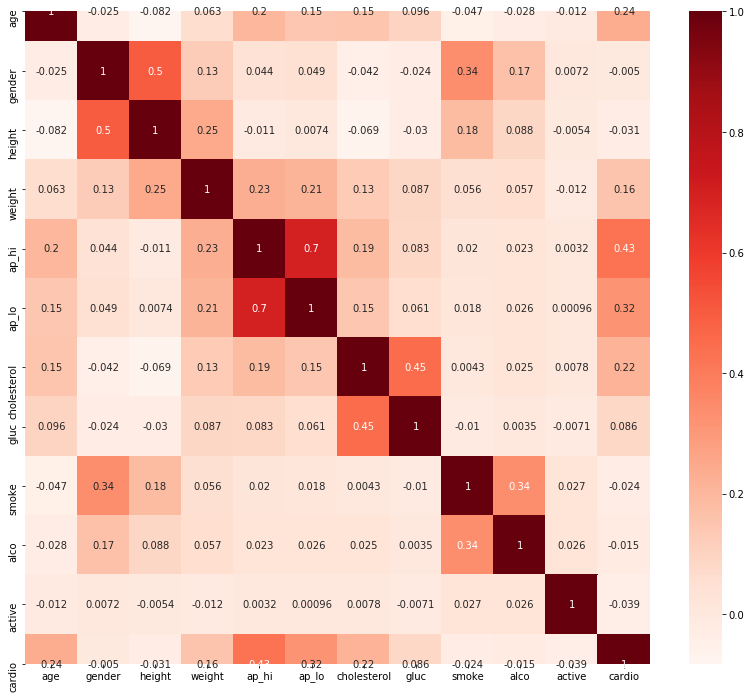

Original data correlations
age            0.236969
gender        -0.004956
height        -0.030852
weight         0.157896
ap_hi          0.428496
ap_lo          0.321585
cholesterol    0.216584
gluc           0.085901
smoke         -0.023665
alco          -0.014827
active        -0.038610
Name: cardio, dtype: float64

Scaled data correlations for comparison (they should be the same):
age            0.236969
gender        -0.004956
height        -0.030852
weight         0.157896
ap_hi          0.428496
ap_lo          0.321585
cholesterol    0.216584
gluc           0.085901
smoke         -0.023665
alco          -0.014827
active        -0.038610
Name: cardio, dtype: float64


In [20]:
#Correlation
plt.figure(figsize=(14,12))
cor = scaledData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# correlations with target class for both un-scaled and scaled data for comparison and validation
print("Original data correlations")
correlations = data.corr()['cardio'].drop('cardio')
print(correlations)

print("\nScaled data correlations for comparison (they should be the same):")
scaledCorrelations = scaledData.corr()['cardio'].drop('cardio')
print(scaledCorrelations)

In [21]:
#helper function to select features based on the treshhold supplied. The correlation can be positive or negative
#hence computing an absolute
def featureSelection(threshold):
    absoluteCorrelation = scaledCorrelations.abs()
    features = absoluteCorrelation[absoluteCorrelation > threshold].index.tolist()
    return features

In [22]:
#for the simple analysis I will drop gender as it is not significant
data.drop("gender",axis=1,inplace=True)
scaledData.drop("gender",axis=1,inplace=True)
data.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000,60108.000000
mean,0.666819,0.485174,0.396832,0.429449,0.526141,0.175526,0.110160,0.085629,0.051890,0.803653,0.488238
std,0.192779,0.227714,0.215112,0.229284,0.205984,0.335059,0.283863,0.279818,0.221807,0.397237,0.499866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.514286,0.333333,0.240741,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.685714,0.500000,0.370370,0.333333,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.800000,0.633333,0.518519,0.583333,0.750000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Models

In [23]:
#generic helper method to execute models and report accuracy
def executeModel(model,trainingFeatures, trainingLabels, testFeatures, testLabels):
    model.fit(trainingFeatures,trainingLabels)
    accuracy = model.score(testFeatures,testLabels)
    print('Model score = ',accuracy * 100,'%\n')
    predictedClass = model.predict(testFeatures)
    confusionMatrix = confusion_matrix(testLabels, predictedClass)
    print("Confusion Matrix: \n",confusionMatrix)
    # f1, recall, support, precision 
    print("\nPrecision, Recall, f1-score and Support\n",classification_report(testLabels, predictedClass))
    return accuracy

In [24]:
# split data into training and test.
# for model selection I will only split 2 ways.

features = scaledData.iloc[:,:-1]
labels = scaledData.iloc[:,-1]
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split( features, labels, test_size=0.2, random_state=0)
print(features.head())
print(labels.head())

        age    height    weight     ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  0.571429  0.600000  0.185185  0.166667   0.50          0.0   0.0      0   
1  0.714286  0.200000  0.611111  0.666667   0.75          1.0   0.0      0   
2  0.628571  0.500000  0.222222  0.500000   0.25          1.0   0.0      0   
3  0.514286  0.633333  0.555556  0.833333   1.00          0.0   0.0      0   
4  0.514286  0.200000  0.074074  0.000000   0.00          0.0   0.0      0   

   alco  active  
0     0       1  
1     0       1  
2     0       0  
3     0       1  
4     0       0  
0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64


In [25]:
accuracies = {}

## Basic Model Analysis

In [26]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=250, random_state=0),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "SVM": SVC(gamma='auto'),
    "Naive bayes": GaussianNB(),
    "Neural Network": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
}


for key, value in models.items():  
    print("\n" + key + "\n")
    accuracy = executeModel(value, trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[key] = accuracy
     



Logistic Regression



C:\Users\adamze\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model score =  72.00964897687572 %

Confusion Matrix: 
 [[4838 1323]
 [2042 3819]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      6161
           1       0.74      0.65      0.69      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022


Random Forest

Model score =  69.75544834470138 %

Confusion Matrix: 
 [[4371 1790]
 [1846 4015]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.71      0.71      6161
           1       0.69      0.69      0.69      5861

    accuracy                           0.70     12022
   macro avg       0.70      0.70      0.70     12022
weighted avg       0.70      0.70      0.70     12022


Decision Tree

Model score =  63.28397937115289 %

Confusion Matrix: 
 [[4056 2

In [27]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame


,Accuracy
SVM,0.723840
Logistic Regression,0.720096
KNN,0.717185
Naive bayes,0.712361
Random Forest,0.697554
Decision Tree,0.632840
Neural Network,0.556397


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

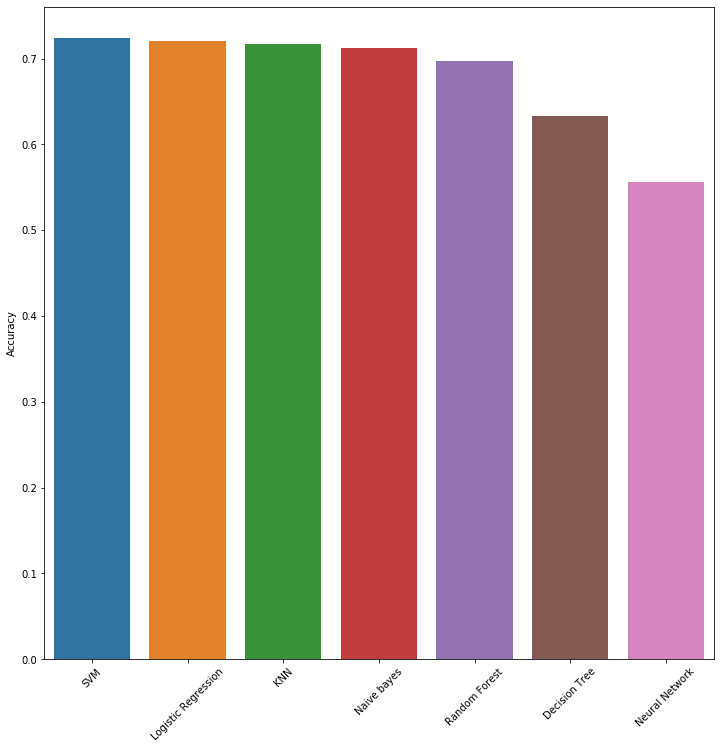

In [28]:
plt.figure(figsize=(12,12))
sns.barplot(x=accuraciesFrame.index,y=accuraciesFrame["Accuracy"])
plt.xticks(rotation=45)

### Try with normalised data

In [29]:
accuracies = {}
features2 = data.iloc[:,:-1]
labels2 = data.iloc[:,-1]
trainFeatures2, testFeatures2, trainLabels2, testLabels2 = train_test_split( features2, labels2, test_size=0.2)
print(features2.head())
print(labels2.head())


normalisedTrain  = normalize(trainFeatures2)
normalisedTest = normalize(testFeatures2)

        age    height    weight     ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  0.571429  0.600000  0.185185  0.166667   0.50          0.0   0.0      0   
1  0.714286  0.200000  0.611111  0.666667   0.75          1.0   0.0      0   
2  0.628571  0.500000  0.222222  0.500000   0.25          1.0   0.0      0   
3  0.514286  0.633333  0.555556  0.833333   1.00          0.0   0.0      0   
4  0.514286  0.200000  0.074074  0.000000   0.00          0.0   0.0      0   

   alco  active  
0     0       1  
1     0       1  
2     0       0  
3     0       1  
4     0       0  
0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64


In [30]:
for key, value in models.items():  
    print("\n" + key + "\n")
    accuracy = executeModel(value, normalisedTrain, trainLabels2, normalisedTest, testLabels2)
    accuracies[key] = accuracy


Logistic Regression



C:\Users\adamze\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model score =  70.43753119281317 %

Confusion Matrix: 
 [[4546 1575]
 [1979 3922]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      6121
           1       0.71      0.66      0.69      5901

    accuracy                           0.70     12022
   macro avg       0.71      0.70      0.70     12022
weighted avg       0.70      0.70      0.70     12022


Random Forest

Model score =  69.26468141740143 %

Confusion Matrix: 
 [[4393 1728]
 [1967 3934]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      6121
           1       0.69      0.67      0.68      5901

    accuracy                           0.69     12022
   macro avg       0.69      0.69      0.69     12022
weighted avg       0.69      0.69      0.69     12022


Decision Tree

Model score =  63.25070703709865 %

Confusion Matrix: 
 [[4078 2

In [31]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
Neural Network,0.710697
SVM,0.707619
Logistic Regression,0.704375
KNN,0.702213
Random Forest,0.692647
Naive bayes,0.675595
Decision Tree,0.632507


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

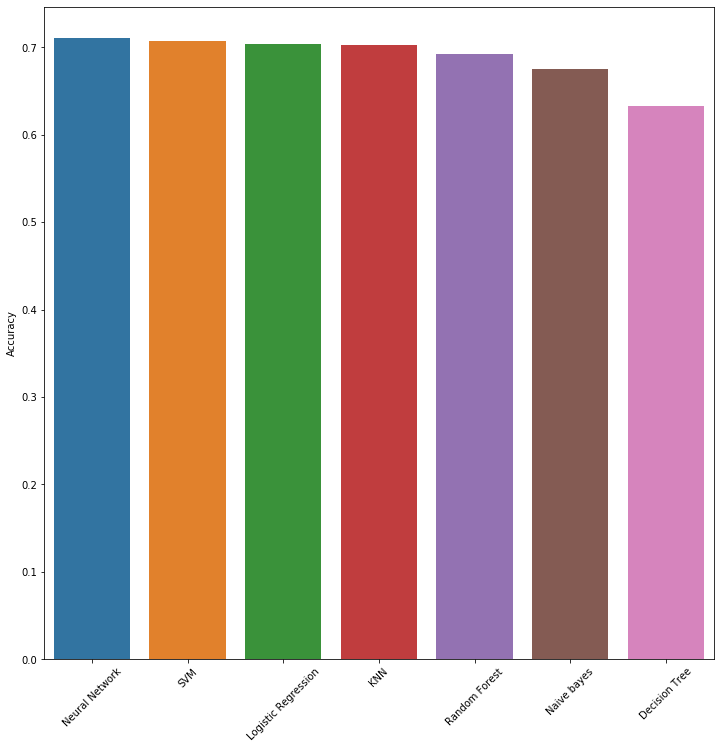

In [32]:
plt.figure(figsize=(12,12))
sns.barplot(x=accuraciesFrame.index,y=accuraciesFrame["Accuracy"])
plt.xticks(rotation=45)

# Hyperparameters optimisation

For hyperparameter optimisation I will choose top 3 SVM, Logistic Regression and KNN

In [33]:
selectedModels = {
    "SVM": SVC(gamma='auto'),
    "Logistic Regression" : LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=15)
    
    
}


#for key, value in selectedModels.items():  
#    accuracies = cross_val_score(estimator=value, X=trainFeatures, y=trainLabels, cv=10)
#    print("\nAccuracy for {} is: {}\n".format(key, accuracies))



## SVM (SVC) hyperparameter optimisation

I will focus on the following parameters for SVM: 
 - kernel
 - gamma
 - c
 - degree


In [34]:
parameters = {
    'kernel': ('linear', 'rbf', 'poly'),
    'gamma': [0.1, 1, 10],
    'C': [0.1, 1, 10, 100],
    'degree':[0, 1, 2, 3]
}




In [35]:
accuracies = {}

for kernel in parameters['kernel']:
    print('Kernel: {}'.format(kernel))
    accuracy = executeModel(SVC(kernel=kernel, gamma='auto'), trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[kernel] = accuracy

Kernel: linear
Model score =  72.12610214606555 %

Confusion Matrix: 
 [[5040 1121]
 [2230 3631]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.69      0.82      0.75      6161
           1       0.76      0.62      0.68      5861

    accuracy                           0.72     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.72      0.72     12022

Kernel: rbf
Model score =  72.38396273498586 %

Confusion Matrix: 
 [[4982 1179]
 [2141 3720]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      6161
           1       0.76      0.63      0.69      5861

    accuracy                           0.72     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.72      0.72     12022

Kernel: poly
Model score =  71.70187988687407 %

Confusion Matrix: 
 

In [36]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
rbf,0.723840
linear,0.721261
poly,0.717019


In [37]:
accuracies = {}
for gamma in parameters['gamma']:
    print('Gamma: {}'.format(gamma))
    accuracy = executeModel(SVC(kernel='rbf', gamma=gamma), trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[gamma] = accuracy
    

Gamma: 0.1
Model score =  72.38396273498586 %

Confusion Matrix: 
 [[4982 1179]
 [2141 3720]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      6161
           1       0.76      0.63      0.69      5861

    accuracy                           0.72     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.72      0.72     12022

Gamma: 1
Model score =  72.66677757444685 %

Confusion Matrix: 
 [[4953 1208]
 [2078 3783]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      6161
           1       0.76      0.65      0.70      5861

    accuracy                           0.73     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.73      0.72     12022

Gamma: 10
Model score =  71.90983197471303 %

Confusion Matrix: 
 [[4777 138

In [38]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
1.0,0.726668
0.1,0.723840
10.0,0.719098


In [39]:
accuracies = {}
for c in parameters['C']:
    print('C: {}'.format(c))
    accuracy = executeModel(SVC(kernel='rbf', gamma=1, C=c), trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[c] = accuracy

C: 0.1
Model score =  72.50873398768924 %

Confusion Matrix: 
 [[4949 1212]
 [2093 3768]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      6161
           1       0.76      0.64      0.70      5861

    accuracy                           0.73     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.73      0.72     12022

C: 1
Model score =  72.66677757444685 %

Confusion Matrix: 
 [[4953 1208]
 [2078 3783]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      6161
           1       0.76      0.65      0.70      5861

    accuracy                           0.73     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.73      0.72     12022

C: 10
Model score =  72.28414573282316 %

Confusion Matrix: 
 [[4969 1192]
 [2140 37

In [40]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
1.0,0.726668
0.1,0.725087
10.0,0.722841
100.0,0.720928


In [41]:
#this does really need to be run, as degree only applies to kernel set to 'poly'
#otherwise the values supplied to 'degree' do not take effect
#I'm leaving it here for completeness
accuracies = {}
for degree in parameters['degree']:
    print('Degree: {}'.format(degree))
    accuracy = executeModel(SVC(kernel='rbf', gamma=1, C=1, degree=degree), trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[degree] = accuracy

Degree: 0
Model score =  72.66677757444685 %

Confusion Matrix: 
 [[4953 1208]
 [2078 3783]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      6161
           1       0.76      0.65      0.70      5861

    accuracy                           0.73     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.73      0.72     12022

Degree: 1
Model score =  72.66677757444685 %

Confusion Matrix: 
 [[4953 1208]
 [2078 3783]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      6161
           1       0.76      0.65      0.70      5861

    accuracy                           0.73     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.73      0.72     12022

Degree: 2
Model score =  72.66677757444685 %

Confusion Matrix: 
 [[4953 120

In [42]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
0,0.726668
1,0.726668
2,0.726668
3,0.726668


In [43]:
#the blow code will take substantial time to run, on my machine it is ~10h

#the below is commented to allow for full notebook run
#kFold = StratifiedKFold()
#gscvSVM = GridSearchCV(SVC(),parameters, cv = kFold)
#bestSVM = gscvSVM.fit(trainFeatures, trainLabels)
#obataining the best parameters
#print('Best kernel:',bestSVM.best_estimator_.get_params()['kernel'])
# obtaing the best gamma
#print('Best gamma:',bestSVM.best_estimator_.get_params()['gamma'])
# obtaing the best C
#print('Best C:',bestSVM.best_estimator_.get_params()['C'])
# obtaing the best degree
#print('Best degree:',bestSVM.best_estimator_.get_params()['degree'])

## LR hyperparameter optimisation 
I will focus on the following parameters:
 - C
 - penalty

In [44]:
parameters = {
    'penalty': ['l1','l2'],
    'C': [1.0,1.5,2.0,2.5]
}

kFold = StratifiedKFold(n_splits = 10)
gscvLR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = kFold)
bestLR = gscvLR.fit(trainFeatures, trainLabels)
#obataining the best penalty and c
print('Best penalty:',bestLR.best_estimator_.get_params()['penalty'])
# obtaing the best C
print('Best C:',bestLR.best_estimator_.get_params()['C'])



Best penalty: l2
Best C: 1.0


In [45]:
#Model execution with best parameters
lrModel = LogisticRegression(solver='liblinear', C=1, penalty='l2')
executeModel(lrModel, trainFeatures, trainLabels, testFeatures, testLabels)


Model score =  72.00964897687572 %

Confusion Matrix: 
 [[4838 1323]
 [2042 3819]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      6161
           1       0.74      0.65      0.69      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022



0.7200964897687573

In [46]:
#Now lets look at potential gains if I apply correlation threshhold to the features
thresholds = [0.005,0.02,0.05,0.2]
for t in thresholds:
    print('Processing threshhold of: {}'.format(t))
    selected = featureSelection(t)
    print('Features selected: {}'.format(selected))
    selectedTrainFeatures = trainFeatures[selected]
    selectedTestFeatures = testFeatures[selected]
    executeModel(lrModel, selectedTrainFeatures, trainLabels, selectedTestFeatures, testLabels)
    

Processing threshhold of: 0.005
Features selected: ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
Model score =  72.00964897687572 %

Confusion Matrix: 
 [[4838 1323]
 [2042 3819]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      6161
           1       0.74      0.65      0.69      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

Processing threshhold of: 0.02
Features selected: ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'active']
Model score =  71.97637664282149 %

Confusion Matrix: 
 [[4831 1330]
 [2039 3822]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      6161
           1       0.74      

## KNN parameter optimisation
I will focus on the following:
 - n
 - weights
 - p for Minkowski 
 - algorithm
 


In [47]:
parameters = {
    'n_neighbors': range(1,40),
    'algorithm': ['kd_tree', 'ball_tree', 'brute'],
    'p': [1,2,3,4],
    'weights': ['uniform', 'distance']
    
}


In [48]:
accuracies = {}
for n in parameters['n_neighbors']:
    print('N: {}'.format(n))
    accuracy = executeModel(KNeighborsClassifier(n_neighbors=n), trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[n] = accuracy
    

N: 1
Model score =  63.86624521710198 %

Confusion Matrix: 
 [[3940 2221]
 [2123 3738]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.65      0.64      0.64      6161
           1       0.63      0.64      0.63      5861

    accuracy                           0.64     12022
   macro avg       0.64      0.64      0.64     12022
weighted avg       0.64      0.64      0.64     12022

N: 2
Model score =  64.55664614872734 %

Confusion Matrix: 
 [[5071 1090]
 [3171 2690]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.62      0.82      0.70      6161
           1       0.71      0.46      0.56      5861

    accuracy                           0.65     12022
   macro avg       0.66      0.64      0.63     12022
weighted avg       0.66      0.65      0.63     12022

N: 3
Model score =  67.24338712360672 %

Confusion Matrix: 
 [[4179 1982]
 [1956 3905]

Model score =  71.7351522209283 %

Confusion Matrix: 
 [[4660 1501]
 [1897 3964]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      6161
           1       0.73      0.68      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

N: 20
Model score =  71.66860755281984 %

Confusion Matrix: 
 [[4812 1349]
 [2057 3804]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      6161
           1       0.74      0.65      0.69      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.71     12022
weighted avg       0.72      0.72      0.72     12022

N: 21
Model score =  71.76010647146897 %

Confusion Matrix: 
 [[4674 1487]
 [1908 3953]]

P

Model score =  72.33405423390451 %

Confusion Matrix: 
 [[4788 1373]
 [1953 3908]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      6161
           1       0.74      0.67      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

N: 38
Model score =  72.30078189985028 %

Confusion Matrix: 
 [[4859 1302]
 [2028 3833]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.79      0.74      6161
           1       0.75      0.65      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.72      0.72     12022

N: 39
Model score =  72.30078189985028 %

Confusion Matrix: 
 [[4785 1376]
 [1954 3907]]



In [49]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T


Text(0, 0.5, 'Accuracy')

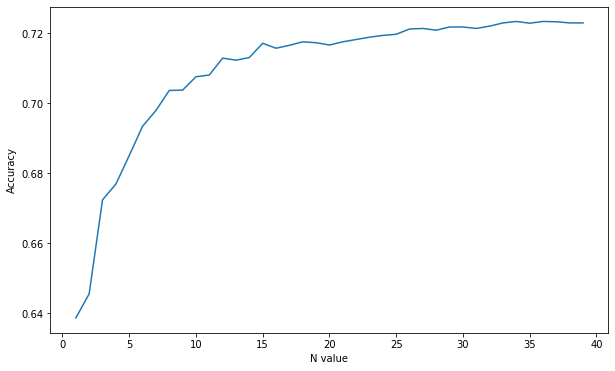

In [50]:
plt.figure(figsize=(10,6))
plt.plot(accuraciesFrame)
plt.xlabel('N value')
plt.ylabel('Accuracy')



In [51]:
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
36,0.723424
34,0.723424
37,0.723341
39,0.723008
38,0.723008
33,0.723008
35,0.722925
32,0.722093
30,0.721843
29,0.721843


In [52]:
accuracies = {}
for a in parameters['algorithm']:
    print('Algorithm: {}'.format(a))
    accuracy = executeModel(KNeighborsClassifier(n_neighbors=17, algorithm=a), trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[a] = accuracy

Algorithm: kd_tree
Model score =  71.66028946930626 %

Confusion Matrix: 
 [[4652 1509]
 [1898 3963]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      6161
           1       0.72      0.68      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

Algorithm: ball_tree
Model score =  71.63533521876559 %

Confusion Matrix: 
 [[4653 1508]
 [1902 3959]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      6161
           1       0.72      0.68      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

Algorithm: brute
Model score =  71.76010647146897 %

Con

Text(0, 0.5, 'Accuracy')

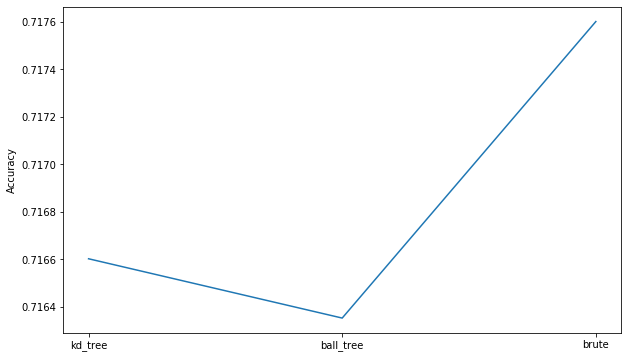

In [53]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
plt.figure(figsize=(10,6))
plt.plot(accuraciesFrame)
plt.ylabel('Accuracy')

In [54]:
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
brute,0.717601
kd_tree,0.716603
ball_tree,0.716353


In [55]:
accuracies = {}
for p in parameters['p']:
    print('P: {}'.format(p))
    accuracy = executeModel(KNeighborsClassifier(n_neighbors=17, algorithm='brute', p=p), trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[p] = accuracy
    

P: 1
Model score =  71.76010647146897 %

Confusion Matrix: 
 [[4665 1496]
 [1899 3962]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      6161
           1       0.73      0.68      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

P: 2
Model score =  71.76010647146897 %

Confusion Matrix: 
 [[4665 1496]
 [1899 3962]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      6161
           1       0.73      0.68      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

P: 3
Model score =  71.55215438363001 %

Confusion Matrix: 
 [[4635 1526]
 [1894 3967]

Text(0, 0.5, 'Accuracy')

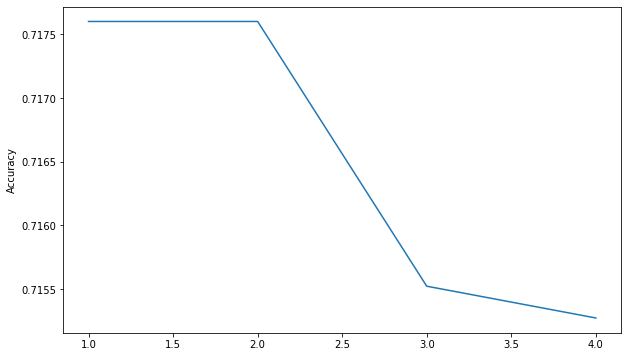

In [56]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
plt.figure(figsize=(10,6))
plt.plot(accuraciesFrame)
plt.ylabel('Accuracy')

In [57]:
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
1,0.717601
2,0.717601
3,0.715522
4,0.715272


In [58]:
accuracies = {}
for w in parameters['weights']:
    print('Weights: {}'.format(w))
    accuracy = executeModel(KNeighborsClassifier(n_neighbors=17, algorithm='brute', p=1, weights=w ), trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[w] = accuracy

Weights: uniform
Model score =  71.76010647146897 %

Confusion Matrix: 
 [[4665 1496]
 [1899 3962]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      6161
           1       0.73      0.68      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022

Weights: distance
Model score =  70.39594077524538 %

Confusion Matrix: 
 [[4484 1677]
 [1882 3979]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.73      0.72      6161
           1       0.70      0.68      0.69      5861

    accuracy                           0.70     12022
   macro avg       0.70      0.70      0.70     12022
weighted avg       0.70      0.70      0.70     12022



Text(0, 0.5, 'Accuracy')

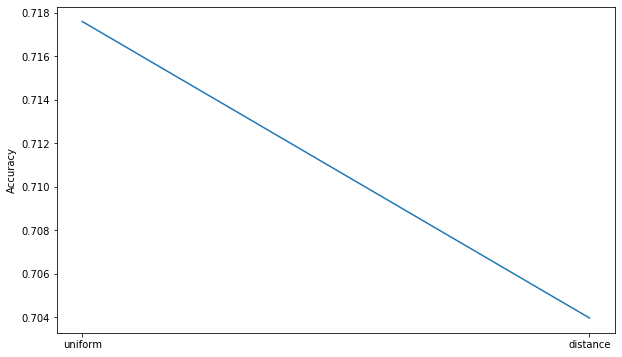

In [59]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
plt.figure(figsize=(10,6))
plt.plot(accuraciesFrame)
plt.ylabel('Accuracy')

In [60]:
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
uniform,0.717601
distance,0.703959


In [61]:
#Model execution with best parameters
executeModel(KNeighborsClassifier(n_neighbors=17, algorithm='brute', p=1, weights='uniform' ), trainFeatures, trainLabels, testFeatures, testLabels)


Model score =  71.76010647146897 %

Confusion Matrix: 
 [[4665 1496]
 [1899 3962]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      6161
           1       0.73      0.68      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022



0.7176010647146898

In [62]:
#Parameter optimisation using Grid Search. Please note this will require sybstantial time to run
#on my laptop it completes in 24h+
#kFold = StratifiedKFold()
#gscvKNN = GridSearchCV(KNeighborsClassifier(),parameters, cv = kFold)
#bestKNN = gscvKNN.fit(trainFeatures, trainLabels)
#obataining the best parameters
#obtaining best n
#print('Best neighbours:',bestKNN.best_estimator_.get_params()['n_neighbors'])
# obtaing the best algorithm
#print('Best algorithm:',bestKNN.best_estimator_.get_params()['algorithm'])
# obtaing the best p
#print('Best neighbours:',bestKNN.best_estimator_.get_params()['p'])
# obtaing the best weights
#print('Best algorithm:',bestKNN.best_estimator_.get_params()['weights'])

# Final outcomes

In [63]:
models = {
    "Logistic Regression" : SVC(kernel='rbf', gamma=1, C=1, degree=0),
    "KNN": KNeighborsClassifier(n_neighbors=17, algorithm='brute', p=1, weights='uniform' ),
    "SVM": LogisticRegression(solver='liblinear', C=1, penalty='l2'),
    
}
accuracies = {}

In [64]:
for key, value in models.items():  
    print("\n" + key + "\n")
    accuracy = executeModel(value, trainFeatures, trainLabels, testFeatures, testLabels)
    accuracies[key] = accuracy


Logistic Regression

Model score =  72.66677757444685 %

Confusion Matrix: 
 [[4953 1208]
 [2078 3783]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      6161
           1       0.76      0.65      0.70      5861

    accuracy                           0.73     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.73      0.72     12022


KNN

Model score =  71.76010647146897 %

Confusion Matrix: 
 [[4665 1496]
 [1899 3962]]

Precision, Recall, f1-score and Support
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      6161
           1       0.73      0.68      0.70      5861

    accuracy                           0.72     12022
   macro avg       0.72      0.72      0.72     12022
weighted avg       0.72      0.72      0.72     12022


SVM

Model score =  72.00964897687572 %

Confusion Matrix: 
 [[4838

In [65]:
accuraciesFrame = pd.DataFrame(accuracies, index=["Accuracy"]).T
accuraciesFrame.sort_values(by=["Accuracy"], axis=0 ,ascending=False, inplace=True)
accuraciesFrame

,Accuracy
Logistic Regression,0.726668
SVM,0.720096
KNN,0.717601


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

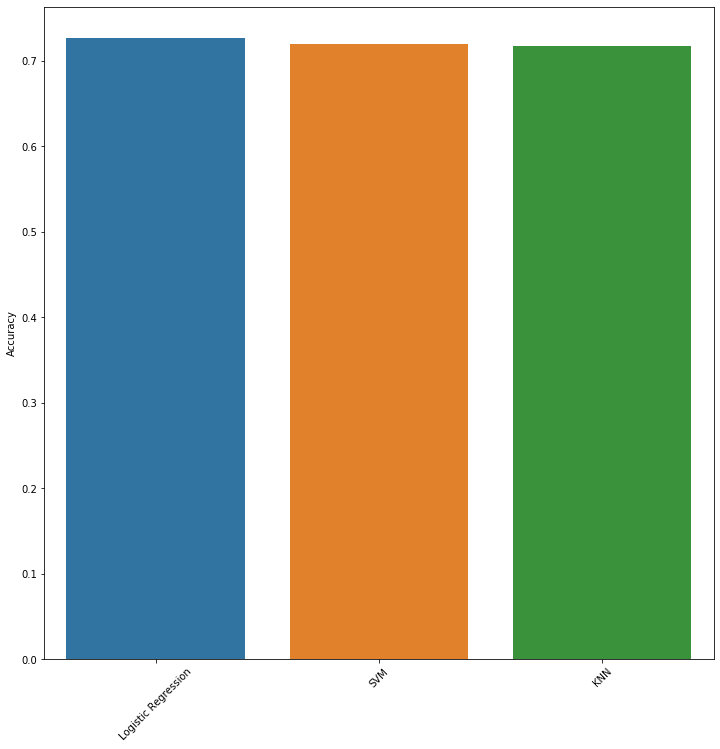

In [66]:
plt.figure(figsize=(12,12))
sns.barplot(x=accuraciesFrame.index,y=accuraciesFrame["Accuracy"])
plt.xticks(rotation=45)